## IPL CAPSTONE PROJECT

## Loading Libraries And Files

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


m = pd.read_csv("matches.csv")
d = pd.read_csv("deliveries.csv")

print(m.head())
print(d.head())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

## Basic Information

In [8]:
m.info()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## check the size of rows and columns of the dataset

In [9]:
print(f" your rows are {m.shape[0]} and your columns are {m.shape[1]}")
print(f" your rows are {d.shape[0]} and your columns are {d.shape[1]}")



 your rows are 1095 and your columns are 20
 your rows are 260920 and your columns are 17


## Lets see how many columns have null values in total

In [11]:
m.isnull().sum()
d.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

## 1.which team won the most matches 

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


Text(0.5, 0, 'matches won')

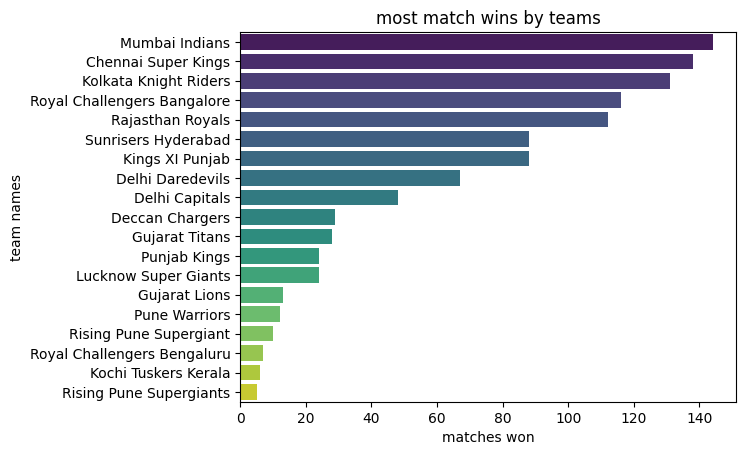

In [34]:
match_wins = m['winner'].value_counts()
print(match_wins)
sns.barplot(y =match_wins.index, x= match_wins.values, palette='viridis')
plt.title("most match wins by teams")
plt.ylabel("team names")
plt.xlabel("matches won")



In [61]:
print(m.columns)

print(d.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


## 2.Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

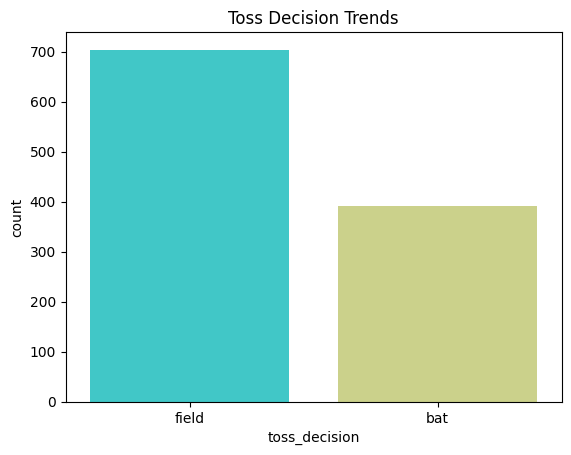

In [41]:
sns.countplot(x = m['toss_decision'], palette='rainbow')
plt.title("Toss Decision Trends")


## 3. Toss winner VS Match winners

In [60]:
count=m[m['toss_winner'] == m['winner']].count()
percentage = (count*100)/m.shape[0]
print(percentage)

id                 50.593607
season             50.593607
city               48.767123
date               50.593607
match_type         50.593607
player_of_match    50.593607
venue              50.593607
team1              50.593607
team2              50.593607
toss_winner        50.593607
toss_decision      50.593607
winner             50.593607
result             50.593607
result_margin      50.045662
target_runs        50.593607
target_overs       50.593607
super_over         50.593607
method              1.004566
umpire1            50.593607
umpire2            50.593607
dtype: float64


## KEY PLAYER PERFORMANCES

## 1. Most "Player of the match "Awards

In [65]:
count =m['player_of_match'].value_counts().head(10)
count

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 players with man of the match')

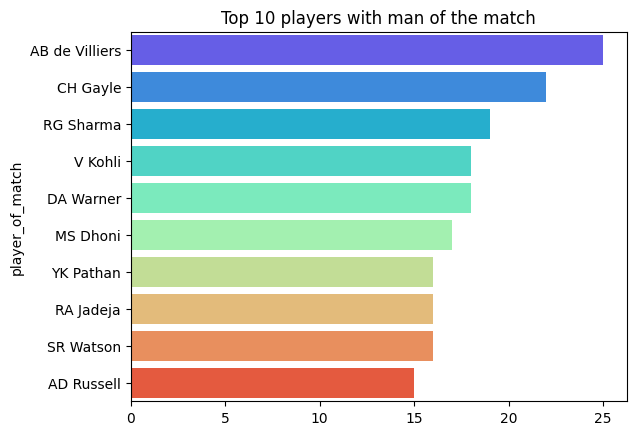

In [73]:
sns.barplot(x = count.values,y=count.index,palette='rainbow')
plt.title("Top 10 players with man of the match")

## most matches played by venue

In [84]:
venue_count = m['venue'].value_counts().head(20)
venue_count

venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Sheikh Zayed Stadium                          29
Sharjah Cricket Stadium                       28
MA Chidambaram Stadium, Chepauk, Chennai      28
Narendra Modi Stadium, Ahmedabad              24
Maharashtra Cricket Association Stadium       22
Dr DY Patil Sports Academy, Mumbai            20
Dr DY Patil Sports Academy                    17
Brabourne Stadium, Mumbai                     17
Subrata Roy Sahara Stadium                    16
Eden Gardens, Kolkata                         16
Name: count, d

<Axes: ylabel='venue'>

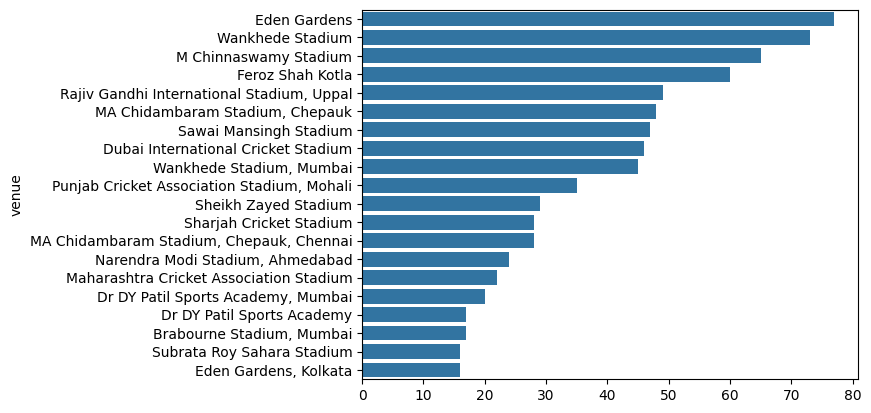

In [85]:
sns.barplot( y = venue_count.index, x = venue_count.values)

## Who won the highest margin by runs?

In [97]:
m[m['result'] =='runs'].sort_values(by ='result_margin', ascending =False).head(1)[['winner','result_margin']]
 

,winner,result_margin
620,Mumbai Indians,146.0


## Which player has the highest individual score?

In [101]:
highest_scores =d.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index()
top_scorer = highest_scores.sort_values(by ='batsman_runs',ascending =False).iloc[0]
print("Highest Individual Score")
print("batter:",top_scorer['batter'])
print("runs:", top_scorer['batsman_runs'])

Highest Individual Score
batter: CH Gayle
runs: 175
